In [156]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")
data.head(3)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48


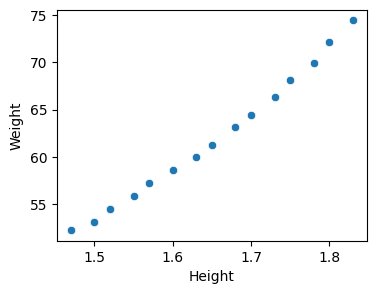

In [157]:
# now check it follows linearity or not 
plt.figure(figsize= (4,3))
sns.scatterplot(x="Height",y= "Weight",data = data)
plt.show() # we can see it follows linearity

In [158]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

In [159]:
 # ab input or output data ko seprate kr lain ga jb b machine learning ka algorithum ko use krna ha ta sklearn ka lgo ko use krna ha data 2 dimensional hona chahyee 
x = data["Height"] # but it is one dimensional data 
x.ndim

1

In [160]:
x = data[["Height"]]
y = data[["Weight"]]
x.ndim,y.ndim # now they all are two dimensional 

(2, 2)

In [161]:
# ab ye sep ho gya ab hm training krain ga data ki phr test krain ga 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=42) 
# check old files new is random state use dto deal our data is not chnge randomly 42 is ideal number we can change it 

In [162]:
# now we create a model through linear regression
from sklearn.linear_model import LinearRegression #liearmodel ak module ha usm malinear regression class h

In [164]:
lr = LinearRegression()
lr.fit(x_train,y_train) # ye x or  y jo data diya ha uspa hmara model  mean y = mx+c is line ko train kra ga or best
# m or c ki value la ka da ga 

LinearRegression()

In [44]:
# now our model is ready and it gives us prediction about our data
# 1.47	52.21  height and weight above according to height we predict weight and check our model 

In [165]:
lr.predict([[1.47]]) # we can see output so itts mean near to it and our model is train good

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.54680929]])

In [166]:
# now to check its accuracy we use a method 
lr.score(x_test,y_test)*100 # iski accuray 98 per ha if accuracy is bad then change random_state above 
# and check again and again after changing it there are more ways we learn furthur

98.47991354990133

In [167]:
# now lets check y = mx+c is correct or not 
lr.coef_ # m explain in register

array([[61.90831296]])

In [168]:
lr.intercept_ # c explain in register

array([-40.45841076])

In [169]:
y = 61.24733475*1.47-39.09215352
y # see both are same 

50.94142856250001

In [170]:
# now we plot it 
y_predict = lr.predict(x)

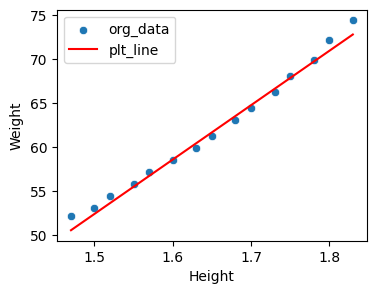

In [171]:
plt.figure(figsize= (4,3))
sns.scatterplot(x="Height",y= "Weight",data = data,label = "org")
plt.plot(data["Height"], y_predict,label = "predict",c = "red")
plt.legend(["org_data","plt_line"])
plt.show() # we can see our model 

# MULTIPLE LINEAR REGRESSION

In [172]:
# isma hma multiple inputs dakhna ko milta ha opr wala ma single input thi 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("employee_salary.csv")
data.head(3)

,Age,Experience,Salary
0,50,1,56719.303055
1,36,14,59632.240807
2,29,3,40319.432622


In [173]:
data.shape

(100, 3)

In [174]:
data.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

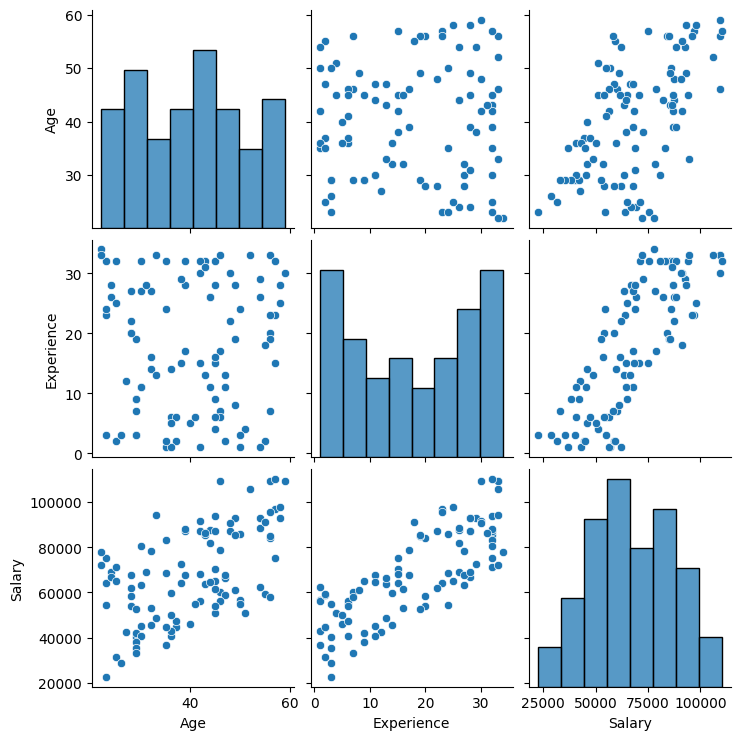

In [176]:
# ab hm jasa start ma btaya age or sallery ka graph or asa hi experience or sallery ka graph
# graph check krna ka liye hm pairplot use krain ga is sa sb graphs a jain ga 
sns.pairplot(data= data)
plt.show()

<Axes: >

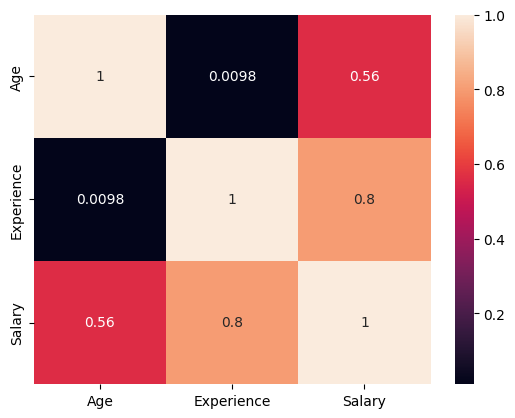

In [177]:
# age or sallary dono ma khuch na khuch linearity ha  but experience ma zyada ha 
# ak or tariqa sa hm linearity ko check kr sakta ha 
sns.heatmap(data= data.corr() , annot=True) # corrrelation mean m opr prha tha annot true mean hma number ma do 

In [ ]:
# age km ha or experience zyada ha jasa ka hmna dakha tha ab hm isko train krta ha 

In [178]:
x = data.iloc[:,:-1] 
y = data[["Salary"]]
x.ndim,y.ndim # y two dimensional nhi tha is liye hmna usko two dimensional kr dliya 

(2, 2)

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42) # myst check x_train etc 

In [180]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [181]:
lr.fit(x_train,y_train)

LinearRegression()

In [182]:
y_train.shape,x_train.shape # must check both are of same size 

((80, 1), (80, 2))

In [183]:
# y = m1x1+m2x2+c ye algorithum bna ga 

In [184]:
# # now check testing score
lr.score(x_test,y_test)*100

89.2305413751556

In [186]:
lr.predict(x_test)

array([[86151.55240588],
       [51219.24807911],
       [44172.39524428],
       [61263.62675435],
       [71608.12589086],
       [50919.12761785],
       [57665.85999141],
       [82252.74548863],
       [68610.14020392],
       [52868.53107648],
       [65461.63443982],
       [87949.97594083],
       [61263.16690783],
       [62612.32944393],
       [83002.12694873],
       [48370.40292975],
       [71457.6058137 ],
       [42822.77286165],
       [63512.69082772],
       [46870.72031649]])

In [188]:
lr.intercept_ # c explain abve

array([-1105.78775858])

In [187]:
lr.coef_ # m above explain

array([[1049.50192137, 1499.22276673]])

In [190]:
# noe check how our equation works 
# y = m1x1+m2x2+c 
# 1049.50192137*age+1499.22276673*experience+(-1105.78775858)

In [189]:
x.columns

Index(['Age', 'Experience'], dtype='object')

# polynomial Regression

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("salary_data6.csv")
data.head(3)

,Level,Salary
0,1,10000
1,2,10500
2,3,11000


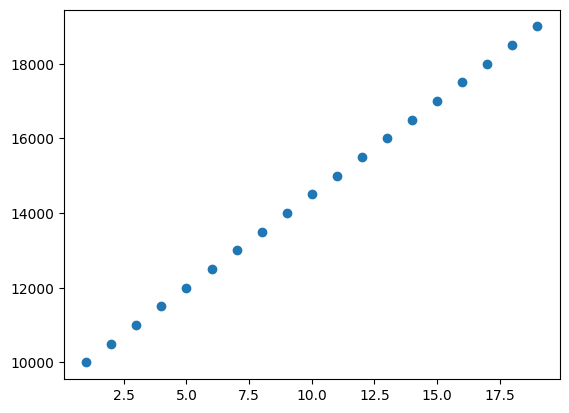

In [4]:
plt.scatter(data["Level"],data["Salary"])
plt.show()

In [5]:
# ab x or y ko sep krain ga taka dependent ot independent ka pta chal saka
x = data[["Level"]]
y = data[["Salary"]] # must check the dimensions
x.ndim,y.ndim

(2, 2)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2) # degree agr binomial data  ha to 2 wrna jo b ha uska according agr perfect line nhi data
# to aga furthur kisis or degree ma move krain ga 
pf.fit(x)
x = pf.transform(x) # now it is converted to array and 1 st one is constant  and other are  ploynomial data and
# 2 degree data or ab isko x ka sath replace kr lain ga 

In [7]:
#  ab hm train test split method lgain ga 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [8]:
#  ab hm polynomial regression ka through train krain ga 
from sklearn.linear_model import LinearRegression # polynomial linear regression ye sb ki equation same hi ha 
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
lr.score(x_test,y_test)

1.0

In [11]:
prd = lr.predict(x)

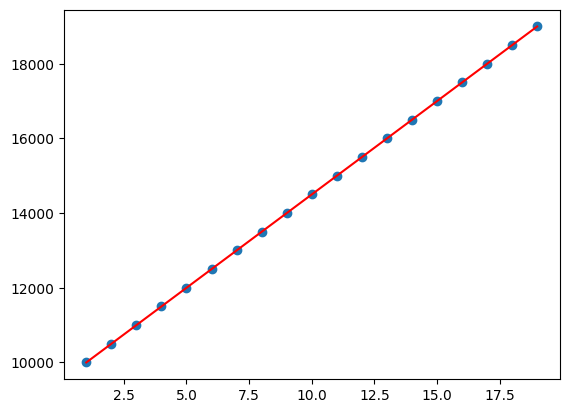

In [12]:
plt.plot(data["Level"],prd,c = "red")
plt.scatter(data["Level"],data["Salary"])
plt.show()

In [13]:
# model is train 100 percent 
# hmna ak chez ka khayak rakhna ha jb b model deploy krna ha to b data iska andr ay ga wo polynomial nature ka ho ga 
# sbsa pahla so jo b data ay ga usko polynomial feature ka andr convert krain ga 

In [14]:
test = pf.transform([[20]]) # ab jo b data dana ha prediction ka wo yahn da ga
test

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,  20., 400.]])

In [15]:
lr.predict(test) # ab yahn ye array sa convert ho ka ay ga  100 per result 

array([[19500.]])

# cost Functions Explain on register blue

In [29]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
data = pd.read_csv("housing_data1.csv")
data

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,8270,3,1981,783,1173,1,1,441003
1,1860,1,2003,1378,1276,3,2,461801
2,6390,3,1900,1459,1391,2,1,111023
3,6191,5,1910,952,3331,3,0,121447
4,6734,3,1991,1519,3821,1,2,488043
...,...,...,...,...,...,...,...,...
95,8215,4,1926,1576,3487,1,1,376633
96,3454,9,1926,1503,3239,1,1,289089
97,9996,1,1997,504,735,2,2,161877
98,3731,8,1920,1626,2182,2,2,412066


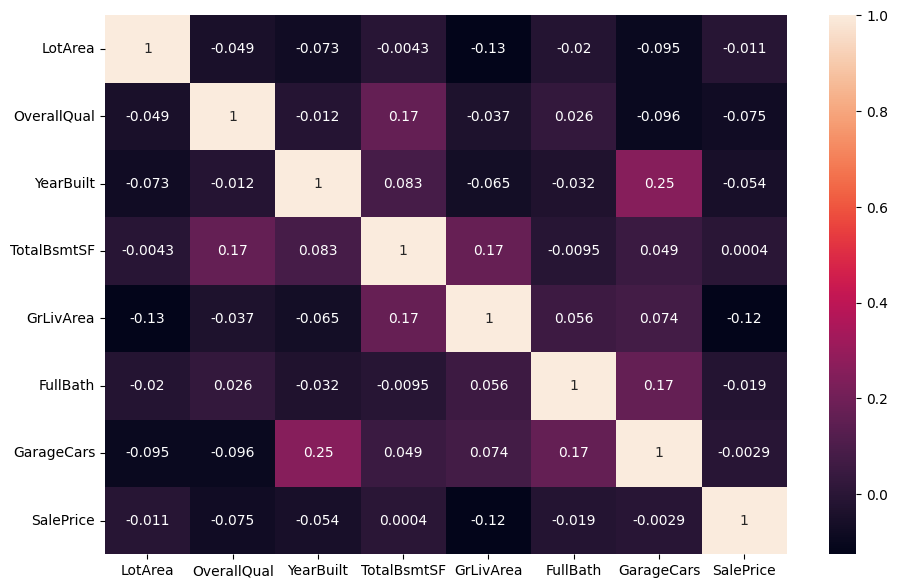

In [30]:
# now lets check linear regression is applied in it ot not so we create correlation metrics in it if it is not correlated
# then our model is not trained good 
plt.figure(figsize= [11,7])
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [31]:
x = data.iloc[:,:-1]
y = data["SalePrice"]

In [32]:
# sale price ka sath dakh sakta ha ye koi itna highly corelated nhi ha even some are neg values 
# now we use scalling on this data bcz data is inbalance some values increses and some decreas 
sc = StandardScaler()
sc.fit(x) # model ko train kr diya 

StandardScaler()

In [34]:
# sc.transform(x) # now scalling of data  is done but ab hm isko data frame bnain taka model easily 
# understand kr saka 
# x_transformed = sc.transform(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars
0,-2.212329,-2.087239,-51.793592,-3.078906,-2.138902,-3.310066,-0.989332
1,-2.213254,-2.382120,-51.778207,-3.075271,-2.138805,-0.654377,0.452422
2,-2.212600,-2.087239,-51.850238,-3.074776,-2.138697,-1.982221,-0.989332
3,-2.212629,-1.792358,-51.843245,-3.077874,-2.136872,-0.654377,-2.431085
4,-2.212550,-2.087239,-51.786599,-3.074409,-2.136412,-3.310066,0.452422
...,...,...,...,...,...,...,...
95,-2.212337,-1.939798,-51.832056,-3.074061,-2.136726,-3.310066,-0.989332
96,-2.213024,-1.202596,-51.832056,-3.074507,-2.136959,-3.310066,-0.989332
97,-2.212079,-2.382120,-51.782403,-3.080611,-2.139314,-1.982221,0.452422
98,-2.212984,-1.350037,-51.836252,-3.073755,-2.137953,-1.982221,0.452422


In [36]:
x.shape,sc.transform(x).shape,x.columns # if name replace with numbers use check this 

((100, 7),
 (100, 7),
 Index(['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
        'FullBath', 'GarageCars'],
       dtype='object'))

In [37]:
# now we use train test split method
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [87]:
# now lasso and ridge which we learn before 
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np  # go down then read this 

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr.score(x_test,y_test)*100 # very poor accuracy  bcz correleation ma value already neg thi 

-31.570429108296437

In [72]:
print (mean_squared_error(y_test,lr.predict(x_test)))# shift tab press then aply values inside() this 
print(mean_absolute_error(y_test,lr.predict(x_test))) # explain on blue register go down then check this
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))#explain on blue register go down then check this

18256141356.941822
115595.82372413852
135115.28913095593


In [ ]:
# but we are here to understand the concept of lasso and ridge 

# linear regression

<function matplotlib.pyplot.show(close=None, block=None)>

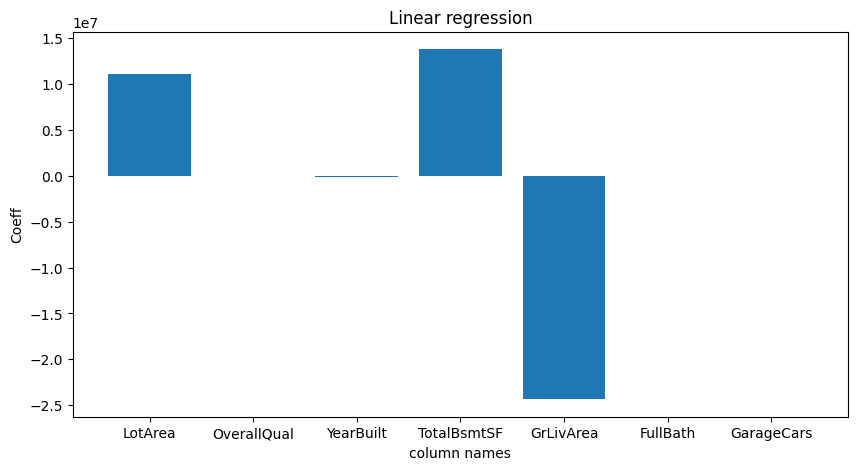

In [51]:
# we represent the values of coeff and constant of lr through
plt.figure(figsize=[10,5])
plt.title("Linear regression")
plt.bar(x.columns,lr.coef_) # o=firs one print columns second one print coeff
plt.xlabel("column names")
plt.ylabel("Coeff")
plt.show

# lasso

In [93]:
# lasso used for feature selection now lets see which features reomve lLasso
la = Lasso(alpha=10) # alpha palenty corners explain in register change in alpha mean error reduces  
la.fit(x_train,y_train)

Lasso(alpha=10)

In [94]:
la.score(x_test,y_test)  

-0.309719847070105

In [95]:
print (mean_squared_error(y_test,la.predict(x_test)))# shift tab press then aply values inside() this 
print(mean_absolute_error(y_test,la.predict(x_test))) # explain on blue register go down then check this
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))#explain on blue register go down then check this

18173103810.753124
115467.88092945758
134807.65486704797


<function matplotlib.pyplot.show(close=None, block=None)>

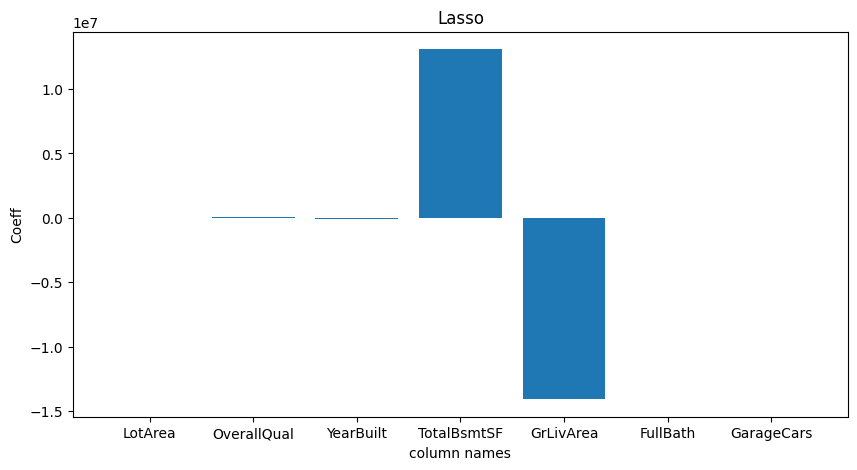

In [96]:
# we represent the values of coeff and constant of lr
plt.figure(figsize=[10,5])
plt.title("Lasso")
plt.bar(x.columns,la.coef_) # o=firs one print columns second one print coeff
plt.xlabel("column names")
plt.ylabel("Coeff")
plt.show

In [ ]:
# lasso ma coeff and costant  ki values kafi kam hiowi ha 

# Ridge

In [97]:
ra = Ridge(alpha=10)
ra.fit(x_train,y_train)

Ridge(alpha=10)

In [98]:
ra.score(x_test,y_test) # isna kafi minimize kiya ha errors ko 

-0.20895724058894527

In [99]:
print (mean_squared_error(y_test,ra.predict(x_test)))# shift tab press then aply values inside() this 
print(mean_absolute_error(y_test,ra.predict(x_test))) # explain on blue register go down then check this
print(np.sqrt(mean_squared_error(y_test,ra.predict(x_test))))#explain on blue register go down then check this

16774965642.56351
110366.5990709537
129518.2058344058


<function matplotlib.pyplot.show(close=None, block=None)>

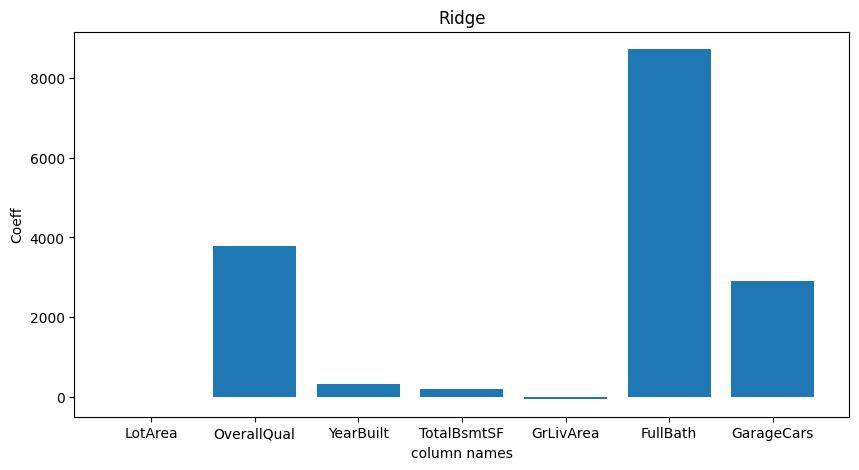

In [100]:
# we represent the values of coeff and constant of lr
plt.figure(figsize=[10,5])
plt.title("Ridge")
plt.bar(x.columns,ra.coef_) # o=firs one print columns second one print coeff
plt.xlabel("column names")
plt.ylabel("Coeff")
plt.show

In [ ]:
# now we check how much error is present in each check above 

In [101]:
# now we compare there all coeff values 
# we create a data frame for this in a dictionary 
df = pd.DataFrame({"Columns names" : x.columns, # we select all column in data frmae also create dictionary
                  "LinearRegression": lr.coef_, # linear regression is column name then lr.coeff to select all values
                   "Lasso":la.coef_,
                   "Ridge":ra.coef_
                  })
df

,Columns names,LinearRegression,Lasso,Ridge
0,LotArea,1.109808e+07,0.000000e+00,7.312189
1,OverallQual,2.453503e+04,2.979018e+04,3789.295855
2,YearBuilt,-1.188015e+05,-1.237924e+05,333.212467
3,TotalBsmtSF,1.378713e+07,1.307565e+07,205.938900
4,GrLivArea,-2.433949e+07,-1.405845e+07,-56.061977
5,FullBath,1.014524e+04,9.641820e+03,8717.766083
6,GarageCars,1.298873e+04,1.147612e+04,2904.977654
